<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/AndreyEsteban_LizarazoHernandez_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Librerias**

In [ ]:
# A CONTINUACION IMPORTAMOS LAS LIBRERIAS QUE UTILIZAREMOS
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns # para graficas estadisticas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from operator import itemgetter
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline

### **Importación de los datos**

El dataset de dígitos de SKLearn consiste en **1795 imágenes de 8x8 píxeles** etiquetadas con los dígitos del 0 al 9. La matrices(2D) que representan cada imagen fueron "colapsadas" en un vector (una sola dimension 1D) de 64 entradas.

De esta manera, cada uno de estos vectores de 64 entradas está etiquetado con un dígito del 0 al 9. Lo cual puede acomodarse dentro de un Pandas.DataFrame como una tabla de dimensiones 1795 filas x 65 columnas.

In [ ]:
# IMPORTAMOS EL DATASET DE DIGITOS DE SKLEARN
digits_dataset = datasets.load_digits(as_frame=True)
# EXTRAEMOS EL PANDAS DATAFRAME
digits_dataframe = digits_dataset['frame']
digits_dataframe.head(n=-1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8


### **Visualización de los datos**

A continuación, proponemos una nueva forma de observar el dataset de dígitos original. La idea es la siguiente: naturalmente, el símbolo del "1" (uno) tiende a parecerse (y por tanto, confundirse) más al símbolo del "7" (siete) que al símbolo del "0" (cero). Es decir, los "7"s (sietes) están más cercanos a la media del "1" (uno) que lo que lo están los "0"s (ceros).

In [ ]:
# FUNCION PARA CALCULAR LA "IMAGEN PROMEDIO" (PIXEL POR PIXEL) DE UN DIGITO.
def mean_image(image_df):
    mean_vector = []
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            mean_vector.append(image_df['pixel_'+str(i)+'_'+str(j)].mean())
    mean_vector = np.array(mean_vector)
    mean_matrix = mean_vector.reshape(8,8)
    return mean_matrix
# FUNCION PARA CALCULAR LA "IMAGEN DESVIACION" (PIXEL POR PIXEL) DE UN DIGITO.
def var_image(image_df):
    var_vector = []
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            var_vector.append(image_df['pixel_'+str(i)+'_'+str(j)].std())
    var_vector = np.array(var_vector)
    var_matrix = var_vector.reshape(8,8)
    return var_matrix
# FUNCION PARA CALCULAR DESVIACION DE UNA IMAGEN DE UN DIGITO RESPECTO A LA
# IMAGEN PROMEDIO DE CUALQUIER OTRO DIGITO (PIXEL POR PIXEL).
def relative_deviation_from_mean(image, mean_image):
    input_matrix = image.values.reshape(8,8)
    diff_matrix = abs(mean_image - input_matrix)
    return diff_matrix.sum()/mean_image.sum()

In [ ]:
# SEPARAMOS LAS IMAGENES DE CADA DIGITO EN DATASETS SEPARADOS
df0 = digits_dataframe.loc[digits_dataframe['target'] == 0]
df1 = digits_dataframe.loc[digits_dataframe['target'] == 1]
df2 = digits_dataframe.loc[digits_dataframe['target'] == 2]
df3 = digits_dataframe.loc[digits_dataframe['target'] == 3]
df4 = digits_dataframe.loc[digits_dataframe['target'] == 4]
df5 = digits_dataframe.loc[digits_dataframe['target'] == 5]
df6 = digits_dataframe.loc[digits_dataframe['target'] == 6]
df7 = digits_dataframe.loc[digits_dataframe['target'] == 7]
df8 = digits_dataframe.loc[digits_dataframe['target'] == 8]
df9 = digits_dataframe.loc[digits_dataframe['target'] == 9]
# CALCULAMOS LAS IMAGENES PROMEDIO PARA CADA UNO DE LOS DIGITOS
imagen_promedio0 = mean_image(df0)
imagen_promedio1 = mean_image(df1)
imagen_promedio2 = mean_image(df2)
imagen_promedio3 = mean_image(df3)
imagen_promedio4 = mean_image(df4)
imagen_promedio5 = mean_image(df5)
imagen_promedio6 = mean_image(df6)
imagen_promedio7 = mean_image(df7)
imagen_promedio8 = mean_image(df8)
imagen_promedio9 = mean_image(df9)

In [ ]:
# COLUMNAS DE UN NUEVO DATASET
# SUS VALORES SON LAS DESVIACIONES DE CADA IMAGEN CON EL PROMEDIO DE CADA DIGITO
desvs0 = []
desvs1 = []
desvs2 = []
desvs3 = []
desvs4 = []
desvs5 = []
desvs6 = []
desvs7 = []
desvs8 = []
desvs9 = []
# COLUMNA DE UN NUEVO DATASET
# SUS VALORES SON LA ETIQUETA CON LA QUE VENIA ASIGNADA CADA IMAGEN
etiqe = []
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "0" (CERO)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS 
for i in range(len(df0)):
    imagen = df0.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df0.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "1" (UNO)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df1)):
    imagen = df1.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df1.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "2" (DOS)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df2)):
    imagen = df2.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df2.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "3" (TRES)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df3)):
    imagen = df3.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df3.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "4" (CUATRO)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df4)):
    imagen = df4.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df4.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "5" (CINCO)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df5)):
    imagen = df5.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df5.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "6" (SEIS)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df6)):
    imagen = df6.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df6.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "7" (SIETE)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df7)):
    imagen = df7.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df7.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "8" (OCHO)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df8)):
    imagen = df8.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df8.iloc[i, -1])
# RECORREMOS TODOS AQUELLAS IMAGENES ETIQUETADAS COMO "9" (NUEVE)
# CALCULAMOS SU DESVIACION RESPECTO A LA IMAGEN PROMEDIO DE CADA DIGITO
# Y ALMACENAMOS ESTA DESVIACION EN CADA UNA DE SUS CORRESPONDIENTES COLUMNAS
for i in range(len(df9)):
    imagen = df9.iloc[i, : -1]
    desv0 = relative_deviation_from_mean(imagen, imagen_promedio0)
    desv1 = relative_deviation_from_mean(imagen, imagen_promedio1)
    desv2 = relative_deviation_from_mean(imagen, imagen_promedio2)
    desv3 = relative_deviation_from_mean(imagen, imagen_promedio3)
    desv4 = relative_deviation_from_mean(imagen, imagen_promedio4)
    desv5 = relative_deviation_from_mean(imagen, imagen_promedio5)
    desv6 = relative_deviation_from_mean(imagen, imagen_promedio6)
    desv7 = relative_deviation_from_mean(imagen, imagen_promedio7)
    desv8 = relative_deviation_from_mean(imagen, imagen_promedio8)
    desv9 = relative_deviation_from_mean(imagen, imagen_promedio9)
    desvs0.append(desv0)
    desvs1.append(desv1)
    desvs2.append(desv2)
    desvs3.append(desv3)
    desvs4.append(desv4)
    desvs5.append(desv5)
    desvs6.append(desv6)
    desvs7.append(desv7)
    desvs8.append(desv8)
    desvs9.append(desv9)
    etiqe.append(df9.iloc[i, -1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'DESVS_6'),
 Text(0.5, 0, 'DESVS_7'),
 Text(0.5, 1.0, 'DESVIACIONES RESPECTO A LA MEDIA')]

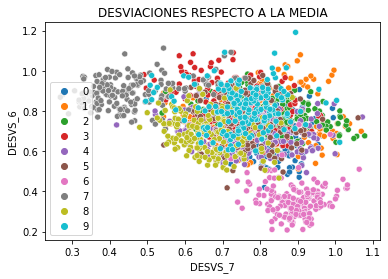

In [ ]:
# PODEMOS GRAFICAR DOS COLUMNAS A LA VEZ
# NOTANDO QUE: PODEMOS SEPARAR LAS IMAGENES DE CADA DIGITO DEL RESTO 
# SOBRE SU RESPECTIVO EJE, DEBIDO A QUE SU DESVIACIÓN SERÁ MENOR SOBRE ESE EJE.
ax = sns.scatterplot(desvs7, desvs6, etiqe, palette="tab10")
ax.set(xlabel='DESVS_7', ylabel='DESVS_6', title='DESVIACIONES RESPECTO A LA MEDIA')

In [ ]:
# PODEMOS GRAFICAR UNA COLUMNA CONTRA EL RESTO, PARA VERIFICAR QUE SIEMPRE
# PODEMOS SEPARAR UNA CLASE SOBRE EL "EJE Y" DEL RESTO.
def plot_separated_class(desvs_y, label):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=8, sharey=True, figsize=(50, 16), dpi=80)
    sns.scatterplot(desvs0, desvs_y, etiqe, palette="tab10", ax=ax0)
    ax0.set(xlabel='DESVS_0', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs1, desvs_y, etiqe, palette="tab10", ax=ax1)
    ax1.set(xlabel='DESVS_1', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs2, desvs_y, etiqe, palette="tab10", ax=ax2)
    ax2.set(xlabel='DESVS_2', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs3, desvs_y, etiqe, palette="tab10", ax=ax3)
    ax3.set(xlabel='DESVS_3', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs4, desvs_y, etiqe, palette="tab10", ax=ax4)
    ax4.set(xlabel='DESVS_4', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs5, desvs_y, etiqe, palette="tab10", ax=ax5)
    ax5.set(xlabel='DESVS_5', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs6, desvs_y, etiqe, palette="tab10", ax=ax6)
    ax6.set(xlabel='DESVS_6', ylabel=label, title='DESVIACIONES')
    sns.scatterplot(desvs7, desvs_y, etiqe, palette="tab10", ax=ax7)
    ax7.set(xlabel='DESVS_7', ylabel=label, title='DESVIACIONES')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3

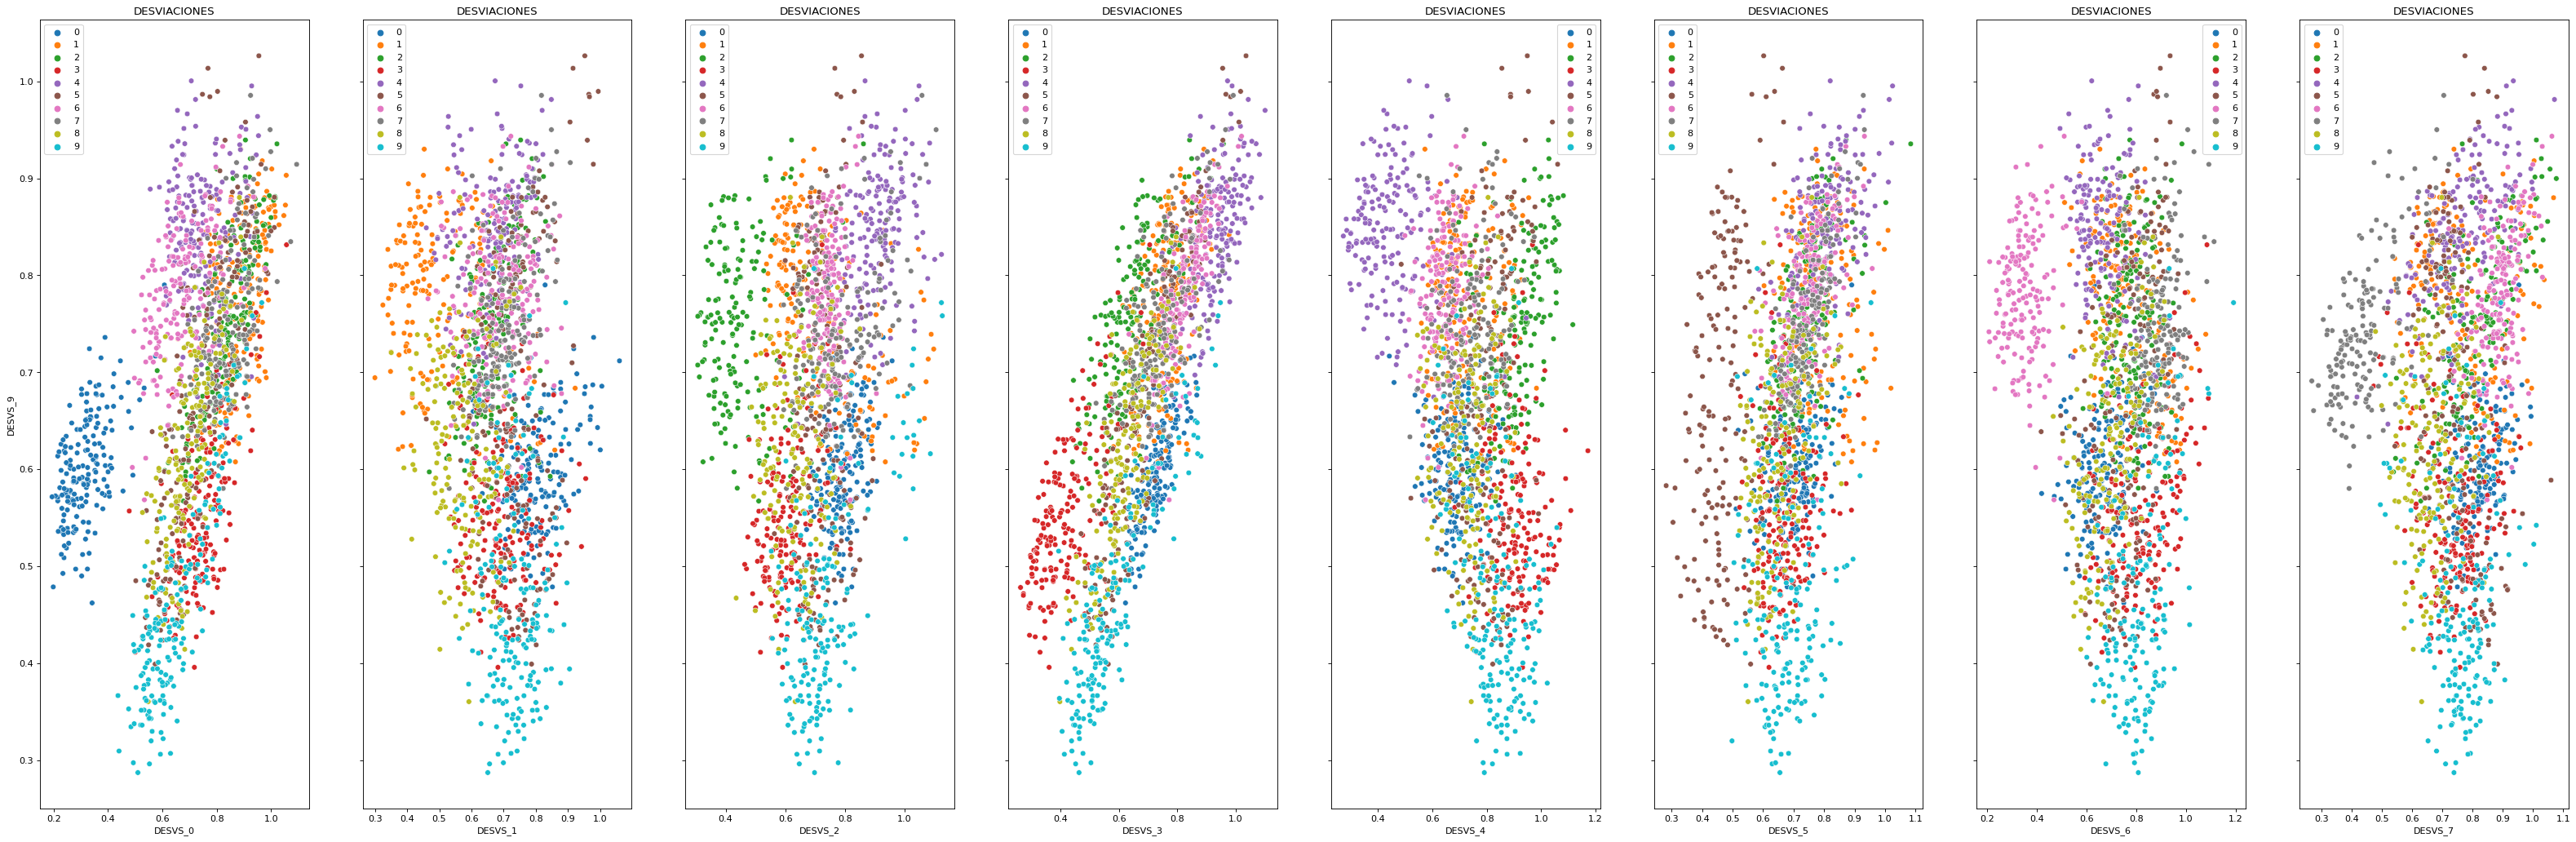

In [ ]:
# PODEMOS UTILIZAR LA VISUALIZACIÓN ANTERIOR PARA SEPARAR VISUALMENTE UNA CLASE
# PUEDE VARIAR LA CLASE QUE QUIERE SEPARAR
# NOTARÁ QUE LA CLASE SOBRESALDRA DEL RESTO HACIA ABAJO EN EL "EJE Y"
plot_separated_class(desvs9, "DESVS_9")

In [ ]:
# LAS COLUMNAS ANTERIORES DEFINEN UN NUEVO DATA SET CON LAS DESVIACIONES
# QUE CARACTERIZAN CADA DIGITO.
# POR EJEMPLO, SE ESPERARÍA QUE AQUELLAS IMAGENES ETIQUETADAS CON EL "1" (UNO)
# SE DESVIARAN EN MAYOR MEDIDA RESPECTO A LA IMAGEN PROMEDIO DEL "0" (CERO),
# QUE LO QUE LO HACE RESPECTO A LA IMAGEN PROMEDIO DEL "7" (SIETE), DEBIDO
# A QUE EL SIMBOLO "1" ES NATURALMENTE MAS SIMILAR AL SIMBOLO "7" QUE AL
# SIMBOLO "0". CON ESTA IDEA EN MENTE, DEFINIMOS ESTE NUEVO DATASET.
df_desvs = pd.DataFrame(list(zip(desvs0, desvs1, desvs2, desvs3, desvs4, desvs5, desvs6, desvs7, desvs8, desvs9, etiqe)),
               columns =['desvs0', 'desvs1', 'desvs2', 'desvs3', 'desvs4', 'desvs5', 'desvs6', 'desvs7', 'desvs8', 'desvs9', 'digit'])
df_desvs.head()

,desvs0,desvs1,desvs2,desvs3,desvs4,desvs5,desvs6,desvs7,desvs8,desvs9,digit
0,0.228290,0.853878,0.812943,0.687450,0.686303,0.657909,0.711410,0.738695,0.570443,0.540041,0
1,0.346060,0.730770,0.854371,0.774643,0.577589,0.649897,0.579416,0.718101,0.558563,0.634594,0
2,0.308943,0.745786,0.816920,0.732525,0.666868,0.711491,0.598853,0.755475,0.568980,0.545680,0
3,0.355845,1.005227,0.866789,0.776353,0.717456,0.687561,0.821926,0.912579,0.710737,0.685771,0
4,0.352194,0.766871,0.751449,0.738972,0.609648,0.653724,0.661194,0.702500,0.559992,0.587849,0


### **Clasificación KNN**

A continuación, podemos comprobar que el nuevo dataset, al menos para el clasificador KNN, sigue siendo sufientemente preciso para llevar a cabo la clasificación de dígitos. Esto, incluso a pesar de que reducimos la dimensionalidad del dataset original de 65 columnas, en un principio, a 11 columnas (una reducción de 54 columnas en total).

Esta reducción en la dimensión del dataset de entrada resultó ser muy útil, especialmente a la hora de llevar a cabo el cross validation: pues, de por sí el KNN es un algoritmo de una alta complejidad computacional (O(n^2) en el peor de los casos), algo muy poco deseable a la hora de hacer un cross validation más exahustivo (mas iteraciones) para tratar de estimar la precisión del modelo con una menor varianza.

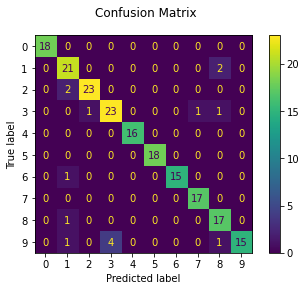

0.94 accuracy with a standard deviation of 0.06


In [ ]:
X = df_desvs.iloc[:, : -1]
y = df_desvs.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)

# HACEMOS LA CLASIFICACION POR MEDIO DEL ALGORITMO KNN
KNN_classifier = KNeighborsClassifier(n_neighbors = 4)
KNN_classifier.fit(X_train, y_train)

y_pred = KNN_classifier.predict(X_test)

# OBTENEMOS LA MATRIZ DE CONFUSION Y LA PRECISION DEL MODELO
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

scores = cross_val_score(KNN_classifier, X, y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
def KNN_classify(k):
    X = df_desvs.iloc[:, : -1]
    y = df_desvs.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)

    # HACEMOS LA CLASIFICACION POR MEDIO DEL ALGORITMO KNN
    KNN_classifier = KNeighborsClassifier(n_neighbors = k)
    KNN_classifier.fit(X_train, y_train)

    scores = cross_val_score(KNN_classifier, X, y, cv=100)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
for i in range(1, 10, 1):
    print("K="+str(i), end=" --> ")
    KNN_classify(k=i)

K=1 --> 0.93 accuracy with a standard deviation of 0.06
K=2 --> 0.92 accuracy with a standard deviation of 0.06
K=3 --> 0.93 accuracy with a standard deviation of 0.06
K=4 --> 0.94 accuracy with a standard deviation of 0.06
K=5 --> 0.94 accuracy with a standard deviation of 0.06
K=6 --> 0.94 accuracy with a standard deviation of 0.05
K=7 --> 0.94 accuracy with a standard deviation of 0.06
K=8 --> 0.94 accuracy with a standard deviation of 0.06
K=9 --> 0.94 accuracy with a standard deviation of 0.06


### **Clasificación con regresión logística**

In [ ]:
def coefbonito(model, X):
    #dict es un diccionario
    #ravel para unir al concatenar en columnas diferentes pero en un solo arrelgo
    #no entendi bien, en un solo numpuarray
    D = dict(coeficientes=np.c_[model.intercept_,model.coef_].ravel())
    return pd.DataFrame(D, index=['intercept']+ X.columns.to_list())

A continuación, implementamos la función de decisión como la composición de clasificadores "uno contra todos". La idea es clasificar la imagen de entrada con cada uno de los 10 "clasificadores uno contra todos" para obtener una lista de las probabilidades con la que la entrada podría ser cada dígito. Luego de esto se escoge como salida la etiqueta que tuvo mayor probabilidad.

In [ ]:
# CLASIFICADOR UNO CONTRA TODOS (IMPLEMENTAMOS UNO PARA CADA DIGITO)
def one_vs_all_logist_reg(datos, clase):
    datos_local = datos.copy(True)
    datos_local['digit'] = datos_local['digit'].apply(lambda x: 'one' if x==clase else 'others')
    X_local = datos_local.iloc[:, : -1]
    y_local = datos_local.iloc[:, -1]

    model = LogisticRegression(max_iter=200)
    X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_local, y_local, test_size=0.10, random_state=42)
    model.fit(X_train_local.values,y_train_local.values)
    # IMPRIMIMOS EL VALOR DE LOS COEFICIENTES PARA LA REGRESION LOGISTICA
    #print(coefbonito(model, X_train))
    return model

In [ ]:
# IMPLEMENTAMOS LA FUNCION DE DECISION COMO LA DEL CLASIFICADOR CON LA
# MAYOR PROBABILIDAD
def decision_function(imagen):
    model0 = one_vs_all_logist_reg(datos=df_desvs, clase=0)
    model1 = one_vs_all_logist_reg(datos=df_desvs, clase=1)
    model2 = one_vs_all_logist_reg(datos=df_desvs, clase=2)
    model3 = one_vs_all_logist_reg(datos=df_desvs, clase=3)
    model4 = one_vs_all_logist_reg(datos=df_desvs, clase=4)
    model5 = one_vs_all_logist_reg(datos=df_desvs, clase=5)
    model6 = one_vs_all_logist_reg(datos=df_desvs, clase=6)
    model7 = one_vs_all_logist_reg(datos=df_desvs, clase=7)
    model8 = one_vs_all_logist_reg(datos=df_desvs, clase=8)
    model9 = one_vs_all_logist_reg(datos=df_desvs, clase=9)

    probs = []
    probs.append([float(0), float(model0.predict_proba(imagen)[0][0])])
    probs.append([float(1), float(model1.predict_proba(imagen)[0][0])])
    probs.append([float(2), float(model2.predict_proba(imagen)[0][0])])
    probs.append([float(3), float(model3.predict_proba(imagen)[0][0])])
    probs.append([float(4), float(model4.predict_proba(imagen)[0][0])])
    probs.append([float(5), float(model5.predict_proba(imagen)[0][0])])
    probs.append([float(6), float(model6.predict_proba(imagen)[0][0])])
    probs.append([float(7), float(model7.predict_proba(imagen)[0][0])])
    probs.append([float(8), float(model8.predict_proba(imagen)[0][0])])
    probs.append([float(9), float(model9.predict_proba(imagen)[0][0])])

    sorted_probs = sorted(probs,key=itemgetter(1))
    return sorted_probs[-1][0]

In [ ]:
dfdesvs1 = df_desvs.loc[df_desvs['digit'] == 2]
fila = [dfdesvs1.iloc[20, :-1]]
decision_function(fila)

8.0

Ahora bien, nos interesa conocer qué tan preciso es la clasificación de dígitos por medio del algoritmo de regresión logística. Para esto, obtenemos la matríz de confusión.

In [ ]:
def confusion_matrix_log_reg():
    model0 = one_vs_all_logist_reg(datos=df_desvs, clase=0)
    model1 = one_vs_all_logist_reg(datos=df_desvs, clase=1)
    model2 = one_vs_all_logist_reg(datos=df_desvs, clase=2)
    model3 = one_vs_all_logist_reg(datos=df_desvs, clase=3)
    model4 = one_vs_all_logist_reg(datos=df_desvs, clase=4)
    model5 = one_vs_all_logist_reg(datos=df_desvs, clase=5)
    model6 = one_vs_all_logist_reg(datos=df_desvs, clase=6)
    model7 = one_vs_all_logist_reg(datos=df_desvs, clase=7)
    model8 = one_vs_all_logist_reg(datos=df_desvs, clase=8)
    model9 = one_vs_all_logist_reg(datos=df_desvs, clase=9)

    X_train_log_reg = X_train
    X_test_log_reg = X_test
    y_train_log_reg = y_train
    y_test_log_reg = y_test
    y_pred_log_reg = []
    for i in range(len(X_test_log_reg)):
        fila = [X_test_log_reg.iloc[i, :]]
        probs = []
        probs.append([0, float(model0.predict_proba(fila)[0][0])])
        probs.append([1, float(model1.predict_proba(fila)[0][0])])
        probs.append([2, float(model2.predict_proba(fila)[0][0])])
        probs.append([3, float(model3.predict_proba(fila)[0][0])])
        probs.append([4, float(model4.predict_proba(fila)[0][0])])
        probs.append([5, float(model5.predict_proba(fila)[0][0])])
        probs.append([6, float(model6.predict_proba(fila)[0][0])])
        probs.append([7, float(model7.predict_proba(fila)[0][0])])
        probs.append([8, float(model8.predict_proba(fila)[0][0])])
        probs.append([9, float(model9.predict_proba(fila)[0][0])])
        sorted_probs = sorted(probs,key=itemgetter(1))
        y_pred_log_reg.append(sorted_probs[-1][0])

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_log_reg, y_pred_log_reg)
    disp.figure_.suptitle("Confusion Matrix")

    plt.show()

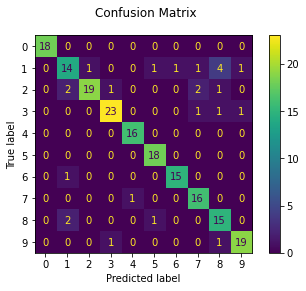

In [ ]:
confusion_matrix_log_reg()

Ahora bien, es razonable pensar que en los coeficientes de la regresión logística de cada modelo se "esconde" una característica única de cada dígito, la cual le permite reconocerlo. En ese orden ideas, a continuación tratamos de comparar los coeficientes de cada uno de los 10 modelos de regresión logística en un mapa de calor: esperariamos que existieran diferencias únicas que hacen a cada modelo diferente, ya que cada dígito es diferente.

In [ ]:
def heat_map_coefficients():
    model0 = one_vs_all_logist_reg(datos=df_desvs, clase=0)
    model1 = one_vs_all_logist_reg(datos=df_desvs, clase=1)
    model2 = one_vs_all_logist_reg(datos=df_desvs, clase=2)
    model3 = one_vs_all_logist_reg(datos=df_desvs, clase=3)
    model4 = one_vs_all_logist_reg(datos=df_desvs, clase=4)
    model5 = one_vs_all_logist_reg(datos=df_desvs, clase=5)
    model6 = one_vs_all_logist_reg(datos=df_desvs, clase=6)
    model7 = one_vs_all_logist_reg(datos=df_desvs, clase=7)
    model8 = one_vs_all_logist_reg(datos=df_desvs, clase=8)
    model9 = one_vs_all_logist_reg(datos=df_desvs, clase=9)

    X_train_log_reg = X_train
    X_test_log_reg = X_test
    y_train_log_reg = y_train
    y_test_log_reg = y_test

    coefbonito0 = coefbonito(model0, X_train_log_reg).T
    coefbonito1 = coefbonito(model1, X_train_log_reg).T
    coefbonito2 = coefbonito(model2, X_train_log_reg).T
    coefbonito3 = coefbonito(model3, X_train_log_reg).T
    coefbonito4 = coefbonito(model4, X_train_log_reg).T
    coefbonito5 = coefbonito(model5, X_train_log_reg).T
    coefbonito6 = coefbonito(model6, X_train_log_reg).T
    coefbonito7 = coefbonito(model7, X_train_log_reg).T
    coefbonito8 = coefbonito(model8, X_train_log_reg).T
    coefbonito9 = coefbonito(model9, X_train_log_reg).T

    frames = [coefbonito0, coefbonito1, coefbonito2, coefbonito3, coefbonito4, coefbonito5, coefbonito6, coefbonito7, coefbonito8, coefbonito9]
    result = pd.concat(frames)
    print(result)
    mapa_calor = sns.heatmap(result.values)
    mapa_calor.set(xlabel='COEFICIENTES', ylabel='CLASIFICADORES', title='MAPA DE CALOR COEFICIENTES')

              intercept     desvs0    desvs1    desvs2    desvs3    desvs4  \
coeficientes   0.203629  11.260987 -2.607377 -1.141502 -1.520486  0.691618   
coeficientes   8.425815  -5.051610  9.187854 -0.996918 -1.701130 -0.881472   
coeficientes   6.537638  -0.617651 -0.422799  9.763709 -0.635193 -3.708631   
coeficientes   1.511348  -2.154309  0.110621  0.144948  9.860965 -2.982982   
coeficientes   7.693675  -0.452775  0.298175 -3.240844 -4.495752  8.581351   
coeficientes   1.720747  -1.562567 -2.179837 -1.650778 -1.015490 -1.167047   
coeficientes   0.970799  -0.323766 -0.369185  0.111029 -1.268079 -0.051004   
coeficientes   5.741171  -2.042197 -2.178982 -1.233497 -0.712529 -0.155870   
coeficientes  -9.692251  -0.206402  3.114532  1.280001 -0.095397  0.455709   
coeficientes   3.226047  -0.322594 -0.227720 -2.656044 -0.660277 -1.406976   

                 desvs5     desvs6     desvs7    desvs8    desvs9  
coeficientes  -0.752853  -0.584790  -0.962674 -0.131519  0.769564  
coefi

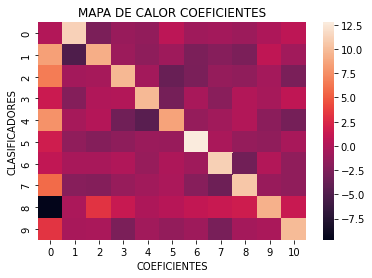

In [ ]:
heat_map_coefficients()

Note lo siguiente: en el "eje x" se ubican las "desviaciones respecto al promedio de cada dígito", mientras que sobre el "eje y" se ubican los 10 modelos de regresión logística que se construyeron.

Lo primero que podemos notar es una simetría respecto a la diagonal principal de la matriz: de modo que, el coeficiente de la desviación de un dígito tiene un mayor peso dentro del modelo que fue especificamente entrenado para reconocer ese dígito, mientras que otorga un peso menor y similar al resto de coeficientes que correponden a las desviaciones respecto a otros dígitos.

Esto último sugiere que los modelos de regresión logística han "aprendido" por medio de amplificar la desviación del dígito que está clasificando, "silenciando" el ruido de la desviación respecto a otros dígitos. Esto último tiene sentido, dado que el método de clasificación por regresión logística es un método de clasificación binario, así que lo único que le interesa es saber qué tan probable es que se acerque o se aleje de una clase en particular. Esto sugiere que la máquina ha aprendido "bien", ya que "aprendio" a enfocarse especificamente en su dígito y ha silenciar los demás, para cada modelo.

### **Método alternativo de clasificación (K-means)**

Hasta ahora hemos hecho clasificación supervisada aprovechando las etiquetas del dataset original. Sin embargo, sería interesante comprobar si el nuevo dataset, que nosotros definimos al principio, almacena la suficiente información para que los datos se agrupen en "clusters", y sí esos clusters separan en dígitos el dataset.

In [ ]:
# DEFINIMOS EL CLASIFICADOR K-MEANS (CON SKLEARN)
n = 10
k_means = KMeans(n_clusters=n, init='random')
# ENTRENAMOS Y PREDECIMOS
k_means.fit(X_train)
Z = k_means.predict(X_test)

cluster 0
19 elements


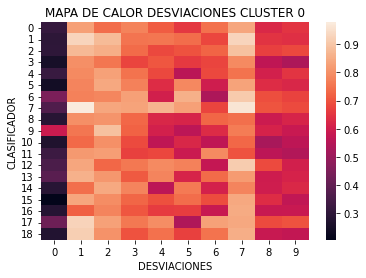

cluster 1
29 elements


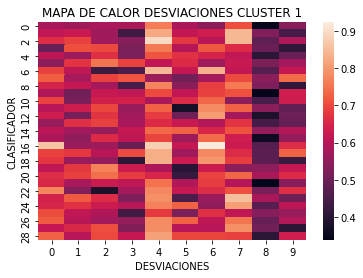

cluster 2
12 elements


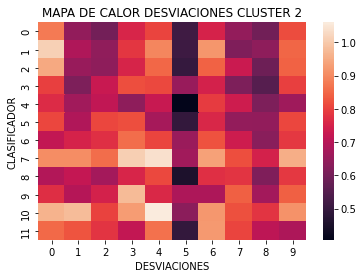

cluster 3
10 elements


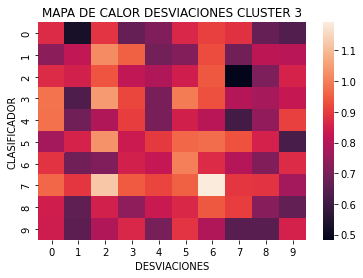

cluster 4
16 elements


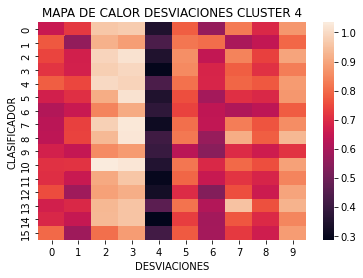

cluster 5
20 elements


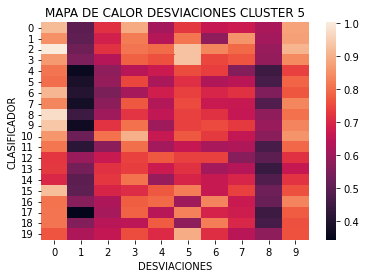

cluster 6
23 elements


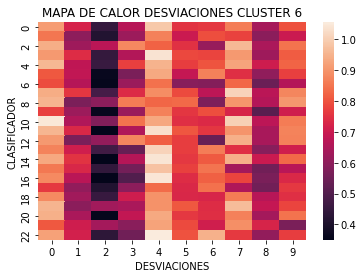

cluster 7
15 elements


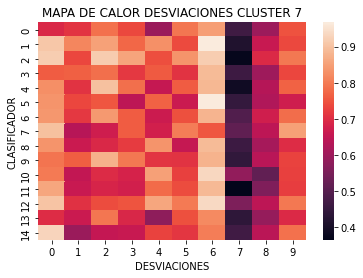

cluster 8
15 elements


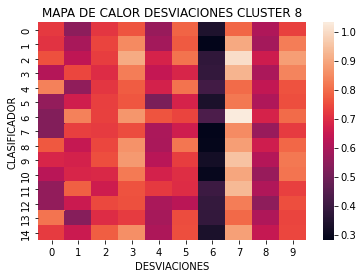

cluster 9
39 elements


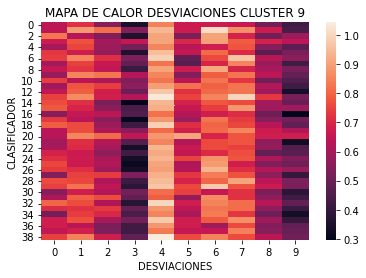

In [ ]:
# A CONTINUACIÓN IMPRIMIREMOS CADA UNO DE LOS 10 CLUSTERS, POR SEPARADO
# LA IDEA ES VER QUÉ COLUMNAS EN COMUN COMPARTEN LOS ELEMENTOS DE UN MISMO CLUSTER
# PARA ESTO, HACEMOS UN MAPA DE CALOR CON EL VALOR DE CADA ENTRADA
# EN EJE X ESTÁN LAS DESVIACIONES Y EN EL EJE Y ESTÁ EL IDENTIFICADOR DE CADA
# ELEMENTO DENTRO DE SU CLUSTER
for i in range(0, n):
    row = np.where(Z==i)[0]
    num = row.shape[0]
    r = np.floor(num/10.) 

    print("cluster " + str(i))
    print(str(num) + " elements")

    frames = []
    for k in range(0, num):
        frames.append(X_test.iloc[row[k], :].to_frame().T)
    result = pd.concat(frames)
    axis = sns.heatmap(result.values)
    axis.set(xlabel='DESVIACIONES', ylabel='CLASIFICADOR', title='MAPA DE CALOR DESVIACIONES CLUSTER '+str(i))
    plt.show()

Puede notar que, en la mayoría de los clusters, se nota una franja oscura de arriba a abajo. Esto quiere decir que todos los elementos de cluster comparten unos valores similares de sus desviaciones. O en otras palabras, dentro de cada clusters hay elementos muy similares, que están dando un especial peso a una de las desviaciones, presumiblemente, la desviación del dígito al cual asemejan.

### **Conclusiones**

Al final de este proyecto podemos concluir lo siguiente:





	1- Preprocesamiento de los datos
		Dedicamos la mayor parte de nuestro tiempo a preprocesar los datos: en tratar de extraer las características diferenciadoras de cada clase.
		Durante este proceso, concluimos que siempre es mejor adoptar una mirada holística de los datos, de modo que cada entrada está caracterizada
		por su relación con las demas entradas y no tanto por sus característica individuales por sí solas: en ese orden de ideas, concluimos que cada clase 
		correspondía al conjunto de datos agrupados en torno a su promedio. Mientras más alejado estuviera una entrada de alguno de esos "promedios" menos
		parecido debia de ser a los representantes de esa clase y por consecuente debería ser representante de alguna otra clase.
	2 - Clasificador KNN:
		El clasificador KNN pareció respaldar nuestra hipótesis inicial del preprocesamiento de los datos: la precisión de 94% y 0.06% de desviación
		nos da a entender que el nuevo dataframe que definimos era de alguna forma equivalente a los datos crudos, además de que permitió disminuir la
		dimensionalidad del dataset de entrenamiento, lo cual resultó muy útil a la hora de hacer el CrossValidation en tiempo razonable.
	3- Clasificador logístico:
		Para el clasificador logístico, la sorpresa más grande fue comparar los pesos que tenían los coeficientes de regresión: pudimos notar que cada
		clasificador dió más peso a la columna que media directamente la desviación de la clase que se estaba intentando clasificar. Esto nos da a entender
		que el clasificador logístico "aprendió" a resaltar los datos relevantes del ruido que producián las demas columnas del dataset. Su precisión también
		parece respaldar la hipótesis de que un dataset más pequeño optimizá los tiempos a la vez que mantiene una precisión deseable.
	4- K-means:
		Para la última parte del proyecto, decidimos utilizar un clasificador NO supervisado. Nuestras espectativas eran que agruparan los datos por dígitos
		contruyendo las clase de manera emergente y natural. Los resultados, aunque no del todo satisfactorios, parecen evidenciar que los elementos de cada
		cluster compartian rasgos característicos en común, y que de hecho, tendian a ser mucho más homogeneos entre elementos de un mismo cluster.
		Con suerte, trabajos futuros nos ayudarán a comprobar esta afirmación. Incluso es posible que con un preprocesamiento distinto los resultados
		mejoren significativamente.


**KNN:**

Ventajas:
1. Logra tener un buen manejo de clasificación y esta puede ser de un problema que presente múltiples variables como es nuestro caso.
2. Para imágenes con pocos pixel logra una óptima eficiencia.

3. Logra manejar problemas de predicción como se evidencia en el proyecto, en ese sentido se puede ver una regresión.

Desventajas: 


1. Los puntos positivos se ven afectados por algo muy importante y es la eficiencia, ya que la complejidad computacional es alta si la cantidad de datos es muy grande.

2. En las ventajas se comenta la eficiencia, pero esto porque son pocos pixel. Si este tiene una dimensionalidad alta la distancia va a ser cada vez más grande y los datos no se podrían  llegar a clasificar porque habría mucha diferencia, esto también se explica a la dependencia tan alta que tiene la distancia y la precisión se ve muy afectada

3. Este clasificador depende demasiado de los datos, en ese sentido,  puede llegar a una exactitud ya que este tolera errores o fallos, pero no deben ser tantos porque podría perjudicar los resultados esperados tamando también que es un clasificador supervisado.


**Regresión Logística:**

Ventajas:
1. Hay una facilidad a la hora de interpretar los resultados
2. Presenta una facilidad a la hora de entrenar datos que tienden a ser grandes.

3. Nos da una noción o medida de que tan apropiado es un predictor y también la asociación que tiene con los datos.

Desventajas:



1.  No tiene un funcionamiento adecuado para problemas no lienalmente separables.

2.  Construye límites lineales, esto se puede ver como desventaja y ventaja, ya que poder dar el límite puede tener ventaja si con un valor bajo se puede obtener resultados favorables, pero de no ser así hay que incrementar el límite muchas veces y esto puede llegar a ser una desventaja.

3. Solo se puede usar para predecir funciones discretas. Por tanto, la variable dependiente de Regresión logística está ligada al conjunto de números discretos. En nuestro caso en particular, tuvimos que hacer 10 clasificadores distintos para poder utilizar el clasificador e interpretar correctamente.

En términos generales se puede decir que ambos clasificadores son eficientes y que uno funciona mejor que otro dependiendo de los datos. En este caso en particular puede llegar a funcionar mejor regresión logística por el tipo de datos que tenemos, pues si tuviéramos imágenes con dimensión más grande la complejidad computacional para KNN sería muy grande. Por otro lado, si tuviéramos un problema no lineal regresión logística no sería tan fuerte y tal vez KNN pueda ser más eficiente, pero esto vale la pena estudiarlo más a fondo.





### **Bibliografía**







*   Acervolima. (s.f.). Acervolima. Obtenido de VENTAJAS Y DESVENTAJAS DE LA REGRESIÓN LOGÍSTICA: https://es.acervolima.com/ventajas-y-desventajas-de-la-regresion-logistica/
*  Programmerclick. (s.f.). programmerclick. Obtenido de resumen del proceso de aprendizaje automático: https://programmerclick.com/article/24621148533/



